## <b>주제: 초해상도(Super-Resolution) 1부</b>
------------------------

### <b>주제 설명</b>

* <b>초해상도(super-resolution)</b>는 저화질의 영상을 고화질의 영상으로 변환하는 기술을 의미합니다. 본 초해상도 강의는 총 2부로 구성되며, 1부에서는 SinGAN을 활용하여 자연 이미지의 해상도를 개선하는 방법을 학습합니다. SinGAN을 이용하면 오직 한 장의 이미지를 학습 데이터로 하여 GAN 네트워크를 학습시킬 수 있습니다. 이후에 학습된 네트워크를 이용하여 초해상도 기술을 적용할 수 있습니다.

* 본 강의에서는 다음의 내용을 학습하게 됩니다.
    * SinGAN 아키텍처(Architecture)
    * SinGAN을 활용한 초해상도 기법 사용 방법
    * SinGAN을 활용한 기타 실습: 랜덤 샘플링 및 애니메이션

### <b>실습 가이드</b>

1. 본 실습은 GPU 자원을 사용하므로 <b>[런타임] - [런타임 유형 변경] - [GPU]</b>을 설정합니다.
2. 모델 및 데이터를 깃허브(GitHub)에서 다운로드하여 Google Colab에 불러옵니다.
3. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
4. 코드는 위에서부터 아래로 순서대로 실행합니다.

* [참고 깃허브 저장소(강의용 데이터셋 저장소)](https://github.com/ndb796/SinGAN)

### <b>SinGAN 아키텍처 소개</b>

* SinGAN의 원본 깃허브 저장소와 관련 논문 리스트는 다음과 같습니다.

1. [SinGAN 공식 소스 코드 저장소](https://github.com/tamarott/SinGAN)
2. [SinGAN 논문(ICCV 2019)](https://arxiv.org/abs/1905.01164)

### <b>데이터 소개</b>

* 본 실습에서는 SinGAN 공식 저장소에서 제공하는 이미지 파일을 활용합니다.
    * <b>한 장의 이미지만 사용</b>되므로, 큰 규모의 데이터셋이 필요하지 않습니다.

### <b>문제 구성</b>

* Google Colab에서 좌측의 <b>[목차]</b> 버튼을 눌러 확인할 수 있습니다.

* <b>Step 1.</b> SinGAN 아키텍처 핵심 정리
        - (이론) SinGAN의 학습 파이프라인
        - (이론) SinGAN의 각 스케일(Scale)에서의 생성(Generation)
        - (이론) SinGAN의 목적 함수(Objective Function)
        - (이론) 학습된 SinGAN 모델 사용 방법

* <b>Step 2.</b> SinGAN을 활용한 초해상도(Super-Resolution) 실습
        - 문제 1. 실습을 위한 PyTorch 라이브러리 업데이트
        - 문제 2. SinGAN 소스 코드 다운로드
        - 문제 3. 입력 이미지와 예상되는 결과 이미지 미리 확인해보기
        - 문제 4. 초해상도 목적의 SinGAN 모델 학습하기
        - 문제 5. 학습된 SinGAN 모델을 이용해 다양한 배율로 초해상도 실습하기

* <b>Step 3.</b> SinGAN을 활용한 랜덤 샘플링(Random Sampling) 및 애니메이션(Animation)
        - 문제 6. SinGAN을 활용한 랜덤 샘플링(Random Sampling)
        - 문제 7. SinGAN을 활용한 애니메이션(Animation) 제작

### <b>최종 목표</b>
    - 초해상도(Super-Resolution) 연구 동향에 대한 이해
    - SinGAN 아키텍처, 학습 및 평가 방법에 대한 이해

### <b>유의사항</b>
    - 실습에 사용된 코드 및 데이터는 강사의 깃허브에서도 확인할 수 있습니다.

- 출제자: 나동빈 강사
---

## <b>Step 1. SinGAN 아키텍처 핵심 정리</b>

* SinGAN 아키텍처의 핵심 내용을 공부합니다.
* <b>참고</b>: [SinGAN: Learning a Generative Model from a Single Natural Image (ICCV 2019)](https://arxiv.org/abs/1905.01164)
* SinGan은 오직 <b>하나의 자연 이미지</b>에 내재되어 있는 특징 정보를 활용합니다.
    * 특히 반복되는 패치(patch)가 존재하는 자연 이미지에 대하여 효과적으로 동작합니다.
* 1시간 내외의 짧은 학습 시간으로 GAN 모델을 학습할 수 있습니다.

#### <b>(이론) SinGAN의 학습 파이프라인</b>

* N + 1개의 스케일(scale)에 대하여 개별적으로 <b>생성자(generator)</b>와 <b>판별자(discriminator)</b>를 학습합니다.
    * 총 N번의 업샘플링(upsampling)을 진행합니다.
* 각 스케일(scale)의 생성자는 입력으로 주어진 이미지에 <b>세밀한(fine)</b> 정보를 추가하는 방식으로 동작합니다.
    * 다음 생성자에게 업샘플링 된 이미지를 넘겨줍니다.
* 각 판별자는 <b>패치(patch) 단위</b>로 진위 여부를 판별합니다.

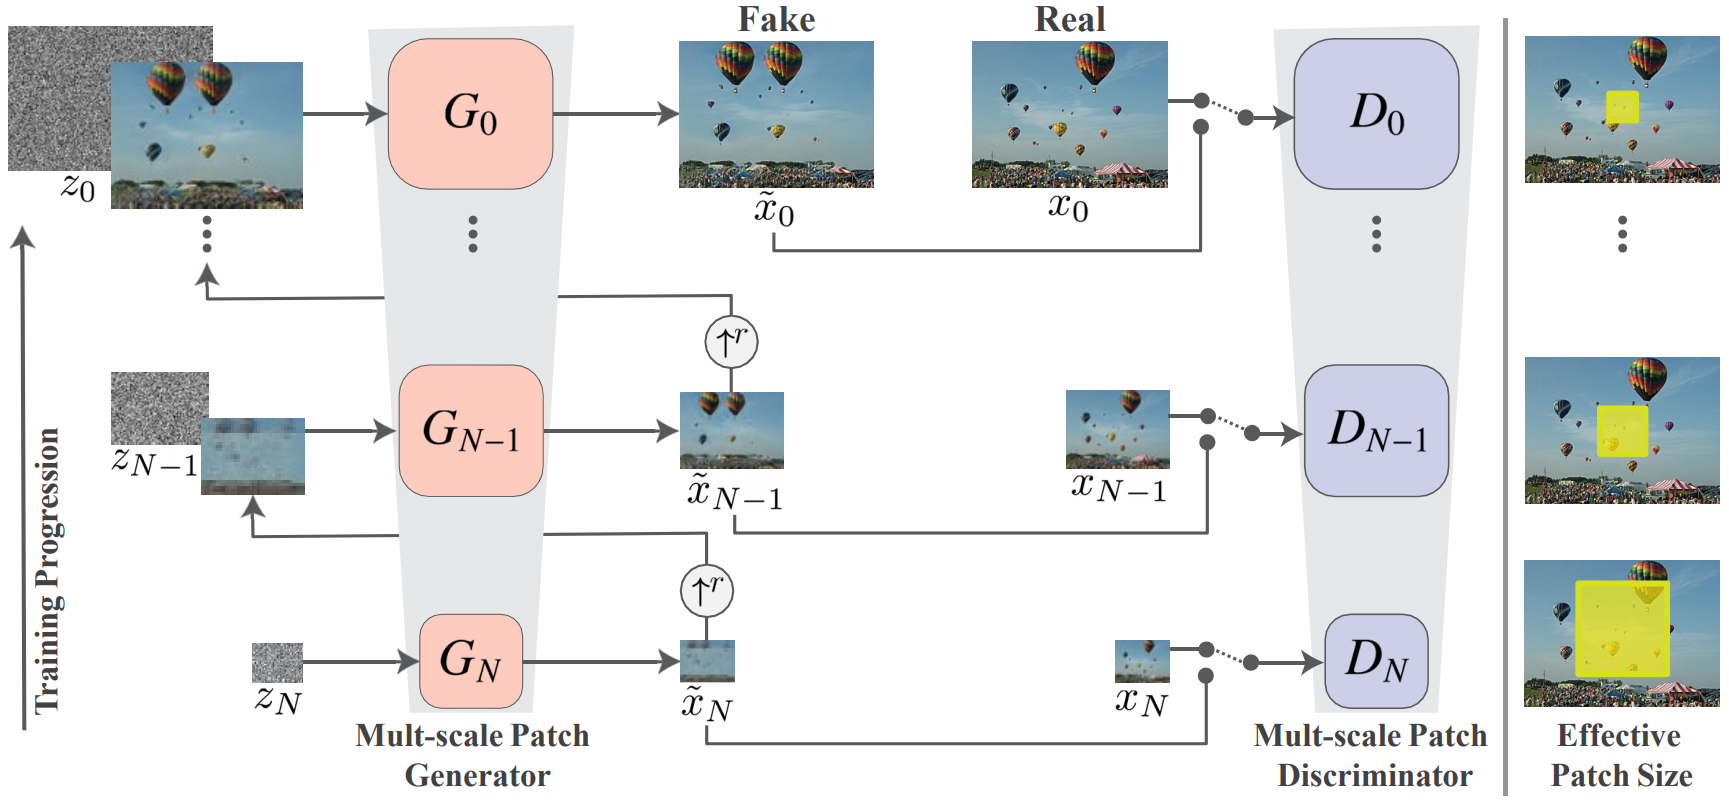

#### <b>(이론) SinGAN의 각 스케일(Scale)에서의 생성(Generation)</b>

* 하나의 스케일(scale)에서의 생성자는 <b>잔여 학습(residual learning)</b>을 이용하여 세밀한 정보를 추가합니다.
    * 이전 스케일에서의 coarse한 이미지는 skip connection을 통해 단순히 더해집니다.

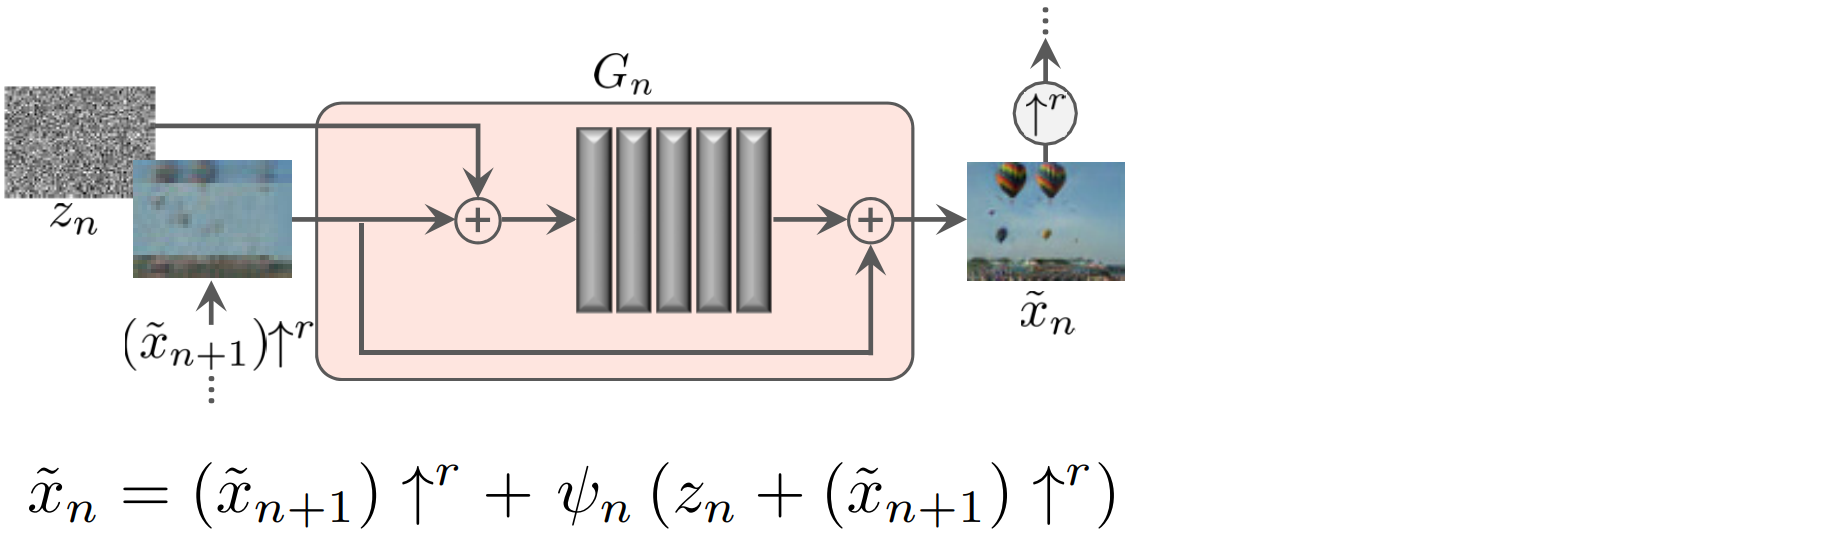

#### <b>(이론) SinGAN의 목적 함수(Objective Function)</b>

* SinGAN에서의 목적 함수는 다음과 같습니다.
* 각 스케일(scale)에서의 생성자(generator)는 한 번 학습이 완료되면 고정됩니다.
* <b>Adversarial loss</b>: 실제(원본) 이미지 내의 패치와 가짜 이미지 내의 패치의 분포가 같아지도록 학습합니다.
* <b>Reconstruction loss</b>: 원본 이미지를 정확히 reconstruction할 수 있도록 학습합니다.
    * 노이즈(noise) 벡터의 값이 0일 때, 원본 이미지를 정확히 재구성합니다.
    * 애니메이션(animation)을 만들 때, 원본 이미지에서부터 출발하도록 설정할 수 있습니다.

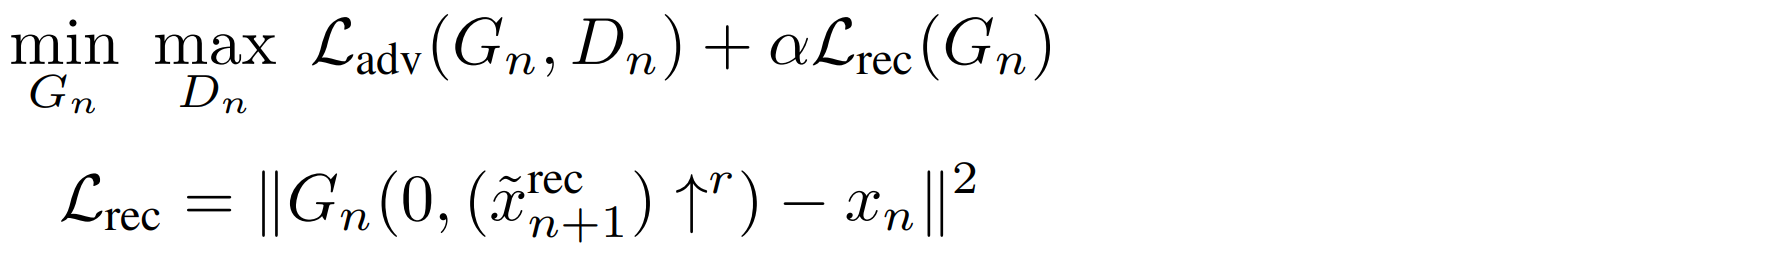

#### <b>(이론) 학습된 SinGAN 모델 사용 방법</b>

* 원하는 스케일(scale)부터 순서대로 포워딩(forwarding)을 진행할 수 있습니다.
* 가장 해상도가 작은 스케일부터 랜덤 샘플링을 사용한다면 다양성(diversity)이 높아집니다.
   * 반면에 원본 이미지와는 매우 다른 형태의 결과가 생성될 수 있습니다.

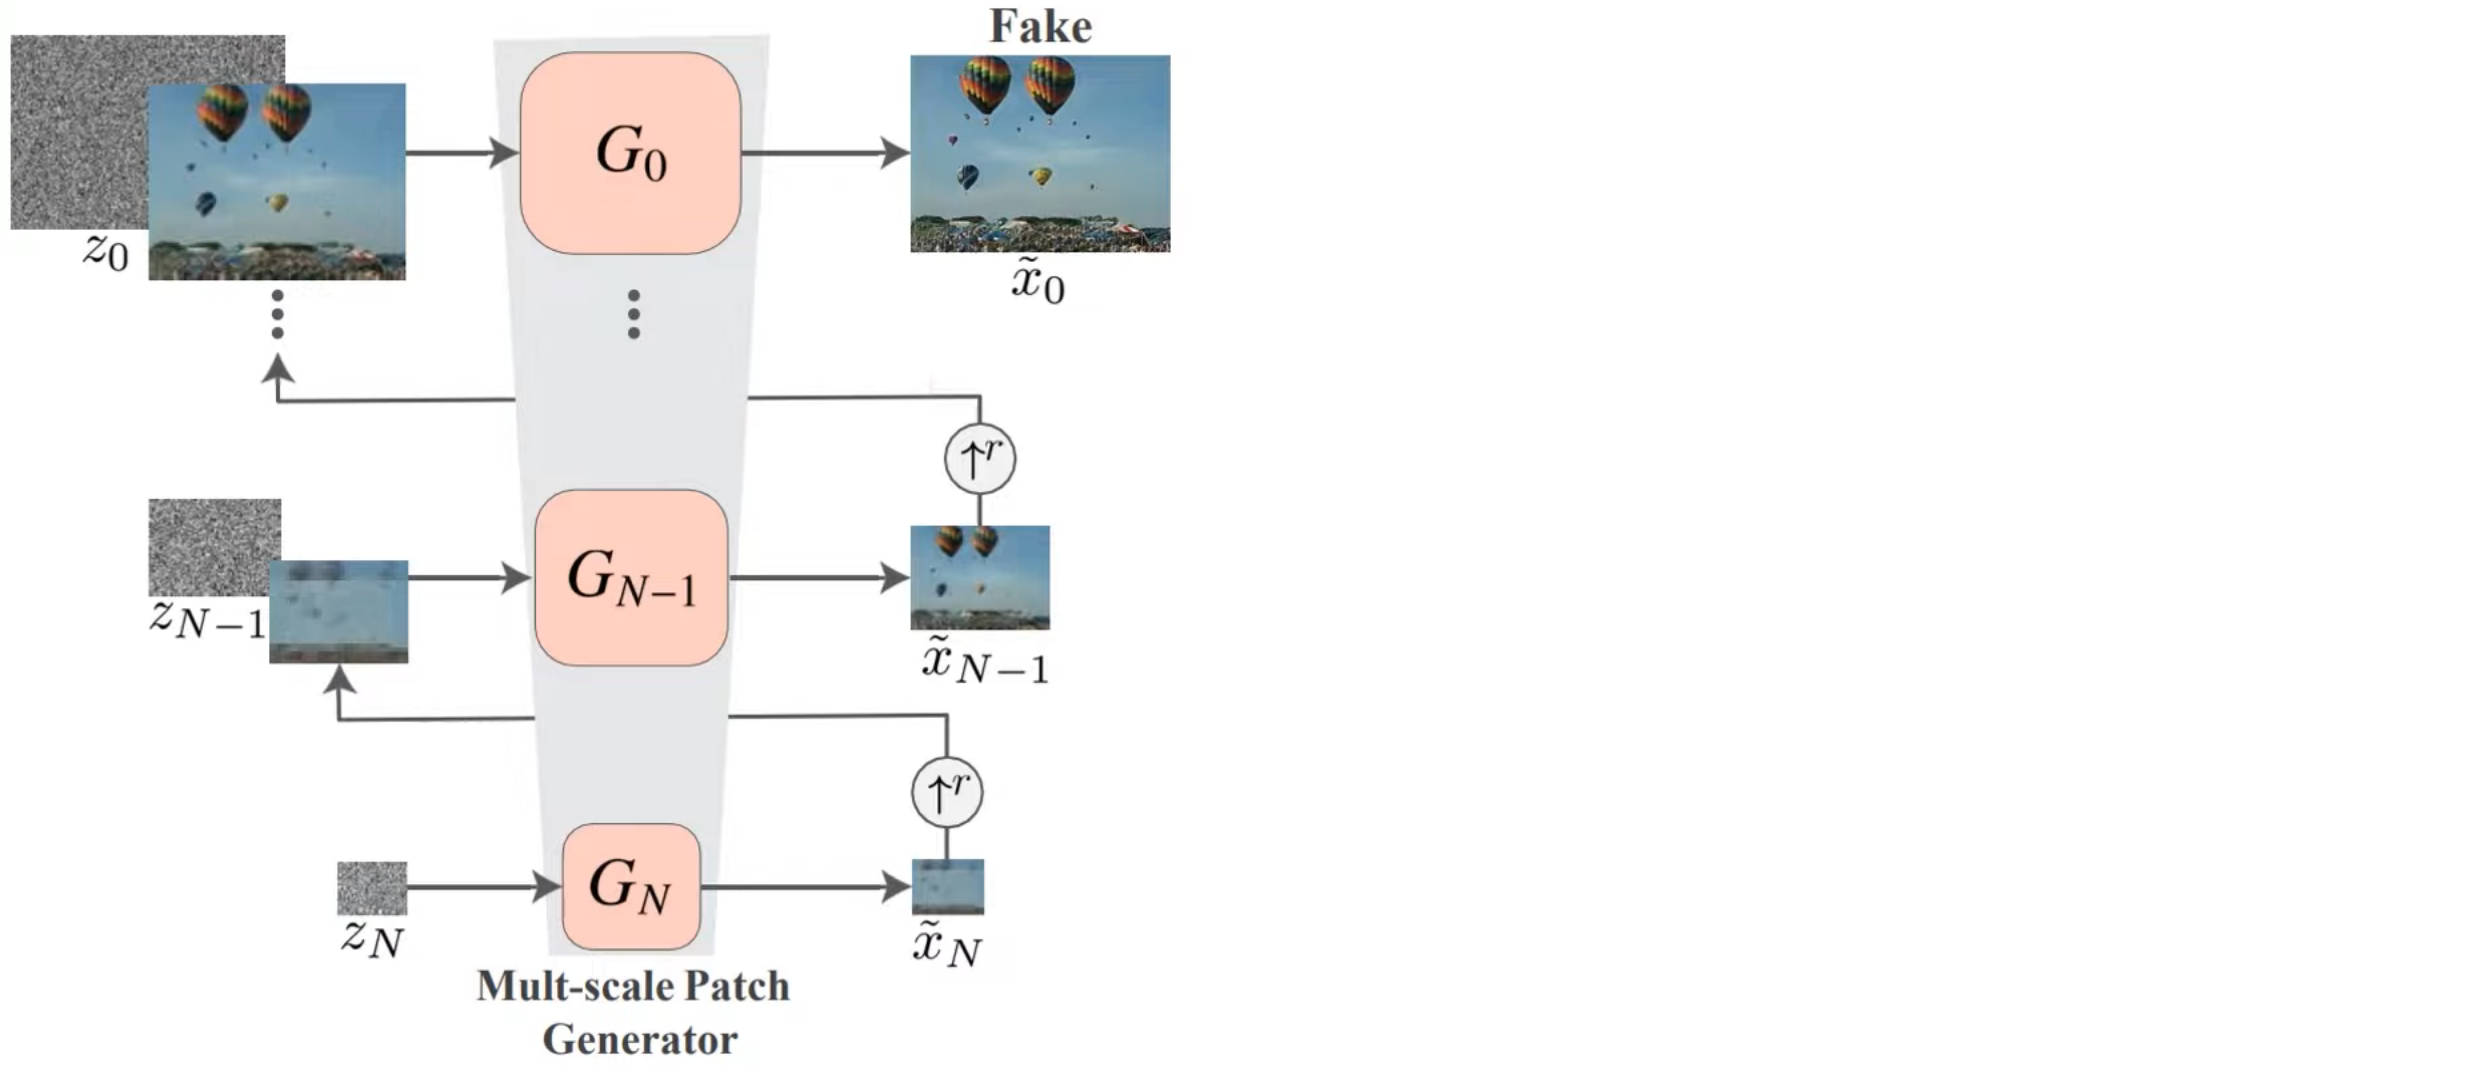

## <b>Step 2. SinGAN을 활용한 초해상도(Super-Resolution) 실습</b>

* <b>참고</b>: 공식 PyTorch 구현 저장소(https://github.com/tamarott/SinGAN)
* SinGAN 모델을 학습한 뒤에, 원본 저해상도(LR) 이미지를 업샘플링(upsampling)합니다.
    * 이후에 업샘플링 된 이미지를 <b>학습된 생성자(generator)에 반복적으로 삽입</b>하여 해상도를 키웁니다.

#### <b>문제 1. 실습을 위한 PyTorch 라이브러리 업데이트</b>

* PyTorch와 TorchVision을 적절한 버전(version)으로 업데이트합니다.
* 아래의 코드를 두 번 실행합니다.
<pre>
!pip install torch==1.4.0 torchvision==0.5.0
</pre>

#### <b>문제 2. SinGAN 소스 코드 다운로드</b>

* SinGAN 소스 코드를 다운로드받습니다.
* <b>포크(fork)된 저장소</b>: https://github.com/ndb796/SinGAN
* 강의 시기와 동일한 소스코드를 이용합니다.
<pre>
1b4906b9afbd30bf32ea3d3f29ca6c5f4a2a223c
</pre>

#### <b>문제 3. 입력 이미지와 예상되는 결과 이미지 미리 확인해보기</b>

* <b>초해상도(Super-resolution)</b> 실습을 위해 사용할 이미지를 시각화할 수 있습니다.
* <b>저해상도 이미지(LR) 예시</b>: 33039_LR.png (80 X 120 해상도)
* <b>초해상도 결과 이미지 예시</b>: 33039.png (320 X 480)

<pre>
Input/
    Editing/
    Harmonization/
    Images/
        33039_LR.png: 학습 데이터
        ...
    Paint/
Downloads/
    SR_BSD100.zip/
        33039.png: 초해상도 결과
        ...
</pre>

In [ ]:
from IPython.display import Image as Display # to display images

# Input/Images/33039_LR.png 이미지를 출력해보기 (원본 너비는 80px)


In [ ]:
# Downloads/SR_BSD100.zip 압축 풀기


In [ ]:
# Downloads/SR_BSD100_100/33039.png 이미지를 출력해보기


#### <b>문제 4. 초해상도 목적의 SinGAN 모델 학습하기</b>

* 앞서 확인한 이미지를 이용해 학습을 진행합니다. (Google Colab 기준 40분 정도의 시간이 소요)
* 기본 설정(default setting): 4배 <b>업샘플링(upsampling)</b>을 진행합니다.
* 초기 너비(min_size): 18px
* 해상도가 큰 스케일(scale)로 올라갈수록 네트워크의 capacity가 증가하므로, 더욱 많은 학습 시간이 소요됩니다.
* 입력 이미지가 80 X 120인 경우 레이어별 학습되는 해상도 예시는 다음과 같습니다.
    0. <b>해상도</b>: 18 X 27
    1. <b>해상도</b>: 22 X 33
    2. <b>해상도</b>: 27 X 40
    3. <b>해상도</b>: 32 X 48
    4. <b>해상도</b>: 38 X 57
    5. <b>해상도</b>: 46 X 69
    6. <b>해상도</b>: 56 X 83
    7. <b>해상도</b>: 67 X 100
    8. <b>해상도</b>: 80 X 120
* 학습을 위한 파라미터들(parameters)

<pre>
* sr_factor: super resolution factor (default=4)
* input_name: training image name (default=33039_LR.png)
</pre>

In [ ]:
# 33039_LR.png 이미지를 입력으로 초해상도 기법을 진행합니다.


#### <b>문제 5. 학습된 SinGAN 모델을 이용해 다양한 배율로 초해상도 실습하기</b>

* 학습된 SinGAN을 이용하여 다양한 배율로 해상도를 개선할 수 있습니다.
* 특정한 해상도가 될 때까지 학습된 SinGAN 네트워크에 여러 번 forwarding하여 결과를 구할 수 있습니다.

In [ ]:
# sr_factor를 2로 사용하기


In [ ]:
# sr_factor를 4로 사용하기


In [ ]:
# sr_factor를 8로 사용하기


## <b>Step 3. SinGAN을 활용한 랜덤 샘플링(Random Sampling) 및 애니메이션(Animation)</b>


#### <b>문제 6. SinGAN을 활용한 랜덤 샘플링(Random Sampling)</b>

* SinGAN은 노이즈(noise) 벡터를 입력으로 받아 다양한 이미지를 생성할 수 있습니다.
* 자신이 원하는 너비와 높이 배율로 샘플링(sampling)을 진행할 수 있습니다.
* 학습을 위한 파라미터들(parameters)

<pre>
* input_name: training image name
</pre>

In [ ]:
# zebra.png를 이용하여 SinGAN 모델 학습하기


In [ ]:
# 학습된 SinGAN을 이용하여 샘플링 해보기 (gen_start_scale=2)


In [ ]:
# 학습된 SinGAN을 이용하여 임의의 크기(arbitrary size)로 샘플링 해보기 (gen_start_scale=0)
# 참고: https://github.com/tamarott/SinGAN/issues/61


#### <b>문제 7. SinGAN을 활용한 애니메이션(Animation) 제작</b>

* latent space에서의 <b>랜덤 워크(random walk)</b>를 수행하여 애니메이션(animation)을 제작할 수 있습니다.

In [ ]:
# lightning1.png 이미지를 이용하여 애니메이션 제작하기
